<a href="https://colab.research.google.com/github/junsung12/find_fraud/blob/master/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B83_%EC%82%B0%EC%82%BC%2C_%EC%9D%B8%EC%82%BC%2C_%EB%8F%84%EB%9D%BC%EC%A7%80_%EA%B5%AC%EB%B6%84_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0(%EC%98%A4%EB%A6%AC%EC%A7%80%EB%82%A0)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 주제:산삼, 인삼, 도라지 구분 모델 만들기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 필요한 패키지 임포트

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

!pip install split-folders
import splitfolders # 이미지 데이터 분리시 사용. 폴더마다(?) 분류해야 하니까.

## 데이터 불러오기

In [ ]:
# zip파일 해제하고 폴더 만들기
#!unzip -qq "" -d "/content/drive/MyDrive/딥러닝"

In [ ]:
# 입력 폴더 (각 클래스별로 폴더가 존재해야 함)
input_folder = '/content/drive/MyDrive/산삼, 인삼, 도라지'

# 출력 폴더
output_folder = '/content/drive/MyDrive/산삼, 인삼, 도라지'

# 비율로 분할 : train 70%, validation = 20%, test 10%
splitfolders.ratio(input_folder, output = output_folder, seed = 42, ratio=(.7, .2, .1))
# splitfolders.fixed("input_folder", output="output", seed=1337, fixed = (100))

Copying files: 625 files [00:50, 12.31 files/s]


In [ ]:
# 이미지 하나 읽어보기
test_img = cv2.imread('/content/drive/MyDrive/산삼, 인삼, 도라지/산삼/산삼101.jpg') # 이미지를 읽어내는 패키지

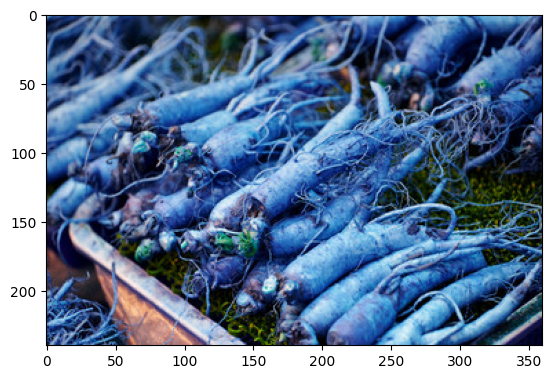

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape  # RGB 채널

(240, 360, 3)

array([[[129, 157, 181],
        [137, 165, 195],
        [125, 161, 199],
        ...,
        [ 62,  90, 154],
        [ 74,  97, 159],
        [ 57,  76, 137]],

       [[117, 151, 187],
        [112, 152, 194],
        [ 92, 141, 187],
        ...,
        [ 71,  96, 160],
        [ 67,  89, 154],
        [ 37,  58, 120]],

       [[100, 140, 192],
        [ 71, 121, 173],
        [ 40,  97, 152],
        ...,
        [ 67,  90, 152],
        [ 45,  65, 130],
        [  8,  28,  93]],

       ...,

       [[ 19,  36,  79],
        [ 34,  60, 120],
        [ 40,  72, 125],
        ...,
        [  4,   5,  43],
        [  4,   6,  41],
        [  1,   3,  33]],

       [[  8,  17,  44],
        [  9,  11,  45],
        [ 30,  51,  89],
        ...,
        [  2,   2,  42],
        [  1,   3,  38],
        [  0,   2,  32]],

       [[  0,  12,  60],
        [ 15,  34,  49],
        [101,  98, 113],
        ...,
        [  2,   2,  42],
        [  0,   2,  37],
        [  1,   3,  33]]], dtype=uint8)
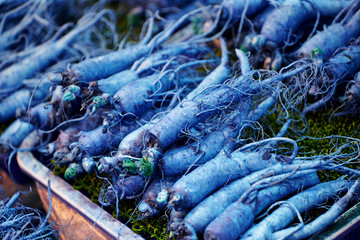

In [ ]:
test_img

In [ ]:
# test_img = cv2.resize(test_img, (150, 150))
# test_img = test_img / 255.0
# test_img = np.expand_dims(test_img, axis=0) # batch_size에 대한 차원을 맞춰줘야 해서 차원을 늘려줌  (batch_size, height, width, channels)

In [ ]:
# train set과 test set 분리하여 이미지 파일을 배열의 형태로 변환-> ImageDataGenerator 라이브러리 사용!
train = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [ ]:
# train데이터와 test데이터, validation 데이터 나누기

train_dataset = train.flow_from_directory("/content/drive/MyDrive/산삼, 인삼, 도라지/train",
                                          target_size= (224, 224),
                                          batch_size= 100,
                                          class_mode= 'categorical')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/산삼, 인삼, 도라지/test",
                                          target_size= (224, 224),
                                          batch_size= 100,
                                          class_mode= 'categorical')

validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/산삼, 인삼, 도라지/val",
                                                    target_size = (224,224),
                                                    batch_size = 100,
                                                    class_mode = 'categorical')

Found 435 images belonging to 3 classes.
Found 64 images belonging to 3 classes.
Found 124 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'도라지': 0, '산삼': 1, '인삼': 2}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,

### 1)컨볼루션 신경망의 설정

In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224, 224, 3), strides = 1, activation='relu'))
model.add(Conv2D(64, (3, 3), strides = 1, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 222, 222, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 64)      0         
                                                                 
 flatten_7 (Flatten)         (None, 788544)            0         
                                                                 
 dense_14 (Dense)            (None, 64)                50466880  
                                                      

In [ ]:
# 모델의 실행 옵션을 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간
modelpath="./ginseng_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행합니다.
history = model.fit(train_dataset, validation_data= validation_dataset, epochs=30, verbose=1, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(test_dataset)[1]))

Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 12.1475 - accuracy: 0.3655
Epoch 1: val_loss improved from inf to 3.81975, saving model to ./ginseng_CNN.hdf5
5/5 [==============================] - 17s 3s/step - loss: 12.1475 - accuracy: 0.3655 - val_loss: 3.8198 - val_accuracy: 0.5565
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 2.1241 - accuracy: 0.3770
Epoch 2: val_loss improved from 3.81975 to 0.97671, saving model to ./ginseng_CNN.hdf5
5/5 [==============================] - 15s 3s/step - loss: 2.1241 - accuracy: 0.3770 - val_loss: 0.9767 - val_accuracy: 0.4839
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 0.9436 - accuracy: 0.4437
Epoch 3: val_loss improved from 0.97671 to 0.93855, saving model to ./ginseng_CNN.hdf5
5/5 [==============================] - 16s 4s/step - loss: 0.9436 - accuracy: 0.4437 - val_loss: 0.9385 - val_accuracy: 0.5565
Epoch 4/30
5/5 [==============================] - ETA: 0s - loss: 0.8403 - accuracy:

In [ ]:
print("모델이 저장된 경로:", modelpath)

모델이 저장된 경로: ./ginseng_CNN.hdf5


#### 테스트 해보기

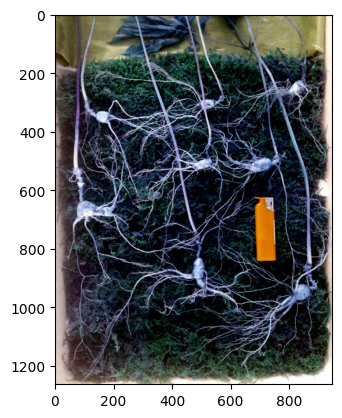

In [ ]:
# 테스트용 이미지 하나 가져오기
test_img = cv2.imread("/content/drive/MyDrive/산삼, 인삼, 도라지/산삼_test.jpg")
plt.imshow(test_img)

In [ ]:
# 다운로드한 이미지의 경로
image_path = "/content/drive/MyDrive/산삼, 인삼, 도라지/산삼_test.jpg"

# 이미지를 모델이 받아들일 수 있는 형식으로 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 이미지 크기 조정
img_array = image.img_to_array(img)  # 이미지를 배열로 변환
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
img_array = img_array / 255.0  # 이미지 정규화 (0~1 사이 값으로 변환)

# 모델을 사용하여 예측
predictions = model.predict(img_array)

# 예측 결과 확인
print(predictions)

# 확률 배열에서 가장 높은 값의 인덱스 찾기
predicted_class_index = np.argmax(predictions)

# 예측된 클래스를 1로, 나머지 클래스들을 0으로 출력
predicted_class = np.zeros_like(predictions)
predicted_class[0][predicted_class_index] = 1

print("도라지:", predicted_class[0][0], "산삼:", predicted_class[0][1], "인삼:", predicted_class[0][2])

1/1 [==============================] - 0s 19ms/step
[[6.900084e-07 9.999919e-01 7.388262e-06]]
도라지: 0.0 산삼: 1.0 인삼: 0.0


1/1 [==============================] - 0s 36ms/step
[[6.3705322e-04 3.0991347e-03 9.9626380e-01]]
도라지: 0.0 산삼: 0.0 인삼: 1.0


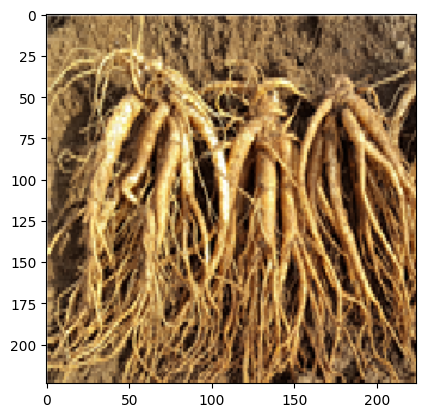

In [ ]:
# 다운로드한 이미지의 경로
image_path = "/content/drive/MyDrive/산삼, 인삼, 도라지/도라지_test.jpg"

# 이미지를 모델이 받아들일 수 있는 형식으로 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 이미지 크기 조정
img_array = image.img_to_array(img)  # 이미지를 배열로 변환
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
img_array = img_array / 255.0  # 이미지 정규화 (0~1 사이 값으로 변환)

plt.imshow(img)
# 모델을 사용하여 예측
predictions = model.predict(img_array)

# 예측 결과 확인
print(predictions)

# 확률 배열에서 가장 높은 값의 인덱스 찾기
predicted_class_index = np.argmax(predictions)

# 예측된 클래스를 1로, 나머지 클래스들을 0으로 출력
predicted_class = np.zeros_like(predictions)
predicted_class[0][predicted_class_index] = 1

print("도라지:", predicted_class[0][0], "산삼:", predicted_class[0][1], "인삼:", predicted_class[0][2])

1/1 [==============================] - 0s 18ms/step
[[9.9814975e-01 1.3661466e-03 4.8417752e-04]]
도라지: 1.0 산삼: 0.0 인삼: 0.0


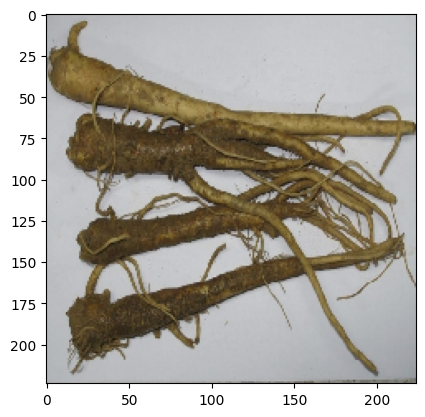

In [ ]:
# 다운로드한 이미지의 경로
image_path = "/content/drive/MyDrive/산삼, 인삼, 도라지/도라지_test3.jpg"
plt.imshow(img)
# 이미지를 모델이 받아들일 수 있는 형식으로 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 이미지 크기 조정
img_array = image.img_to_array(img)  # 이미지를 배열로 변환
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
img_array = img_array / 255.0  # 이미지 정규화 (0~1 사이 값으로 변환)

# 모델을 사용하여 예측
predictions = model.predict(img_array)

# 예측 결과 확인
print(predictions)

# 확률 배열에서 가장 높은 값의 인덱스 찾기
predicted_class_index = np.argmax(predictions)

# 예측된 클래스를 1로, 나머지 클래스들을 0으로 출력
predicted_class = np.zeros_like(predictions)
predicted_class[0][predicted_class_index] = 1

print("도라지:", predicted_class[0][0], "산삼:", predicted_class[0][1], "인삼:", predicted_class[0][2])

1/1 [==============================] - 0s 19ms/step
[[0.06447005 0.07920437 0.85632557]]
도라지: 0.0 산삼: 0.0 인삼: 1.0


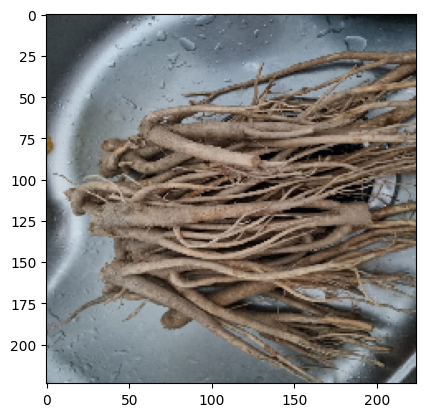

In [ ]:
# 다운로드한 이미지의 경로
image_path = "/content/drive/MyDrive/산삼, 인삼, 도라지/인삼_test.jpg"
plt.imshow(img)
# 이미지를 모델이 받아들일 수 있는 형식으로 전처리
img = image.load_img(image_path, target_size=(224, 224))  # 이미지 크기 조정
img_array = image.img_to_array(img)  # 이미지를 배열로 변환
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
img_array = img_array / 255.0  # 이미지 정규화 (0~1 사이 값으로 변환)

# 모델을 사용하여 예측
predictions = model.predict(img_array)

# 예측 결과 확인
print(predictions)

# 확률 배열에서 가장 높은 값의 인덱스 찾기
predicted_class_index = np.argmax(predictions)

# 예측된 클래스를 1로, 나머지 클래스들을 0으로 출력
predicted_class = np.zeros_like(predictions)
predicted_class[0][predicted_class_index] = 1

print("도라지:", predicted_class[0][0], "산삼:", predicted_class[0][1], "인삼:", predicted_class[0][2])